In [1]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
graph = ChemicalSpaceGraph.from_file('../cache-111.7-ir.h5', '../cache-cohen-111.7-ir.p')
len(graph.edges)

840456

In [3]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])
edges.describe()

,2
count,840456.000000
mean,0.211413
std,0.151790
min,-0.120370
25%,0.098071
50%,0.207547
75%,0.317422
max,0.918418


Text(0,0.5,'No. (log)')

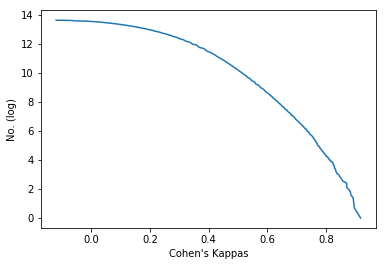

In [4]:
values = edges[2].sort_values()
plt.plot(values, np.log(len(values) - np.arange(len(values))))
plt.xlabel('Cohen\'s Kappas')
plt.ylabel('No. (log)')

In [5]:
from gephistreamer import graph as gephi_graph, streamer
gephi_nodes = [gephi_graph.Node(x) for x in graph.nodes]

In [13]:
def show(threshold, prefix='cohen-'):
    a = edges[edges[2] < threshold]
    m = a[2].max()
    f = lambda x: x / m
    gephi_edges_ = [
        gephi_graph.Edge(x, y, directed=False, weight=f(graph.edges[(x, y)]), label='%.4f' % graph.edges[(x, y)])
        for x, y in graph.edges
        if graph.edges[(x, y)] >= threshold
    ]
    print(len(gephi_edges_))
    stream = streamer.Streamer(streamer.GephiWS(workspace='%s%s' % (prefix, threshold)))
    stream.add_node(*gephi_nodes)
    stream.add_edge(*gephi_edges_)
    return gephi_edges_

In [8]:
from sklearn.metrics import cohen_kappa_score
def similarity(x, y):
    xx = np.ceil(x * 10)
    yy = np.ceil(y * 10)
    return cohen_kappa_score(xx, yy)
base = graph.fingerprints_df['Cc1cc2ccoc(=O)n2n1']
gephi_nodes = [gephi_graph.Node(x, d=similarity(graph.fingerprints_df[x], base)) for x in graph.nodes]

In [15]:
show(0.68);

1300


In [15]:
from matplotlib import pyplot as plt
f = graph.fingerprints_df['Cn1ccc2oc(=O)cnc21']
x = np.arange(len(f))

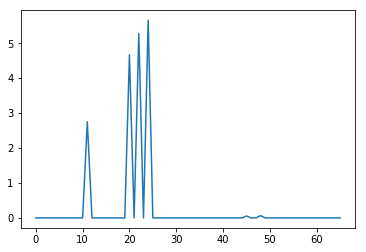

In [16]:
plt.plot(x, f)

NameError: name 'gephi_graph' is not defined